# Data exploration notebook

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from plotnine import ggplot, aes, labs, theme, theme_classic, facet_wrap, element_text
from plotnine import geom_histogram, geom_bar

# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

In [21]:
campaign_ad = pd.read_csv("MLUnige2023_subscriptions_train.csv", index_col="Id")
# campaign_ad = campaign_ad.astype({'job': 'category',
#                     'marital': 'category',
#                     'education': 'category',
#                     'device': 'category',
#                     'outcome_old': 'category',
#                     'X1': 'category',
#                     'X2': 'category',
#                     'X3': 'category',
#                     'subscription': 'category'})
campaign_ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8952 entries, 0 to 8951
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8952 non-null   int64  
 1   job               8952 non-null   object 
 2   marital           8952 non-null   object 
 3   education         8952 non-null   object 
 4   device            8952 non-null   object 
 5   day               8952 non-null   int64  
 6   month             8952 non-null   int64  
 7   time_spent        8952 non-null   float64
 8   banner_views      8952 non-null   int64  
 9   banner_views_old  8952 non-null   int64  
 10  days_elapsed_old  8952 non-null   int64  
 11  outcome_old       8952 non-null   object 
 12  X1                8952 non-null   int64  
 13  X2                8952 non-null   int64  
 14  X3                8952 non-null   int64  
 15  X4                8952 non-null   float64
 16  subscription      8952 non-null   int64  


In [20]:
campaign_ad

,age,job,marital,education,device,day,month,time_spent,banner_views,banner_views_old,days_elapsed_old,outcome_old,X1,X2,X3,X4,subscription
Id,,,,,,,,,,,,,,,,,
0,28,freelance,married,grad_school,smartphone,4,2,26.80,3,4,196,failure,0,0,1,0.072803,1
1,48,industrial_worker,married,university,smartphone,30,4,13.05,1,1,79,success,0,0,0,0.075454,1
2,27,teacher,married,university,smartphone,14,7,8.10,3,0,-1,na,0,1,1,0.068110,0
3,44,unemployed,divorced,university,smartphone,13,5,7.10,2,1,369,other,0,0,1,0.091942,0
4,29,manager,single,grad_school,smartphone,26,4,15.90,2,2,143,success,0,0,0,0.085922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8947,54,industrial_worker,married,university,smartphone,16,7,7.30,1,0,-1,na,1,0,0,0.072803,0
8948,43,industrial_worker,married,university,smartphone,4,2,37.75,2,0,-1,na,0,0,1,0.081456,1
8949,27,manager,single,grad_school,na,5,6,29.00,3,0,-1,na,0,0,1,0.079186,1


No missing values in dataset indentified by python.
However, columns

- `job`
- `education`
- `device`
- `outcome_old`

have missing values in the form of the string `'na'`.

`day` and `month` should probably be combined into a date column.

In [22]:
campaign_ad.replace('na', np.nan, inplace=True)

In [23]:
campaign_ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8952 entries, 0 to 8951
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8952 non-null   int64  
 1   job               8891 non-null   object 
 2   marital           8952 non-null   object 
 3   education         8574 non-null   object 
 4   device            6902 non-null   object 
 5   day               8952 non-null   int64  
 6   month             8952 non-null   int64  
 7   time_spent        8952 non-null   float64
 8   banner_views      8952 non-null   int64  
 9   banner_views_old  8952 non-null   int64  
 10  days_elapsed_old  8952 non-null   int64  
 11  outcome_old       2148 non-null   object 
 12  X1                8952 non-null   int64  
 13  X2                8952 non-null   int64  
 14  X3                8952 non-null   int64  
 15  X4                8952 non-null   float64
 16  subscription      8952 non-null   int64  


Now we definitely have some missing values!

In [24]:
campaign_ad['date'] = [dt.date(2022, campaign_ad['month'][x], campaign_ad['day'][x]) for x in range(len(campaign_ad))]

In [25]:
campaign_ad.drop(columns=['day', 'month'], inplace=True)
campaign_ad


,age,job,marital,education,device,time_spent,banner_views,banner_views_old,days_elapsed_old,outcome_old,X1,X2,X3,X4,subscription,date
Id,,,,,,,,,,,,,,,,
0,28,freelance,married,grad_school,smartphone,26.80,3,4,196,failure,0,0,1,0.072803,1,2022-02-04
1,48,industrial_worker,married,university,smartphone,13.05,1,1,79,success,0,0,0,0.075454,1,2022-04-30
2,27,teacher,married,university,smartphone,8.10,3,0,-1,NaN,0,1,1,0.068110,0,2022-07-14
3,44,unemployed,divorced,university,smartphone,7.10,2,1,369,other,0,0,1,0.091942,0,2022-05-13
4,29,manager,single,grad_school,smartphone,15.90,2,2,143,success,0,0,0,0.085922,1,2022-04-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8947,54,industrial_worker,married,university,smartphone,7.30,1,0,-1,NaN,1,0,0,0.072803,0,2022-07-16
8948,43,industrial_worker,married,university,smartphone,37.75,2,0,-1,NaN,0,0,1,0.081456,1,2022-02-04
8949,27,manager,single,grad_school,NaN,29.00,3,0,-1,NaN,0,0,1,0.079186,1,2022-06-05


In [26]:
cols = list(campaign_ad.columns)
datecol = cols[-1]
cols[6:] = cols[5:len(cols)-1]
cols[5] = datecol

campaign_ad = campaign_ad[cols]
campaign_ad

,age,job,marital,education,device,date,time_spent,banner_views,banner_views_old,days_elapsed_old,outcome_old,X1,X2,X3,X4,subscription
Id,,,,,,,,,,,,,,,,
0,28,freelance,married,grad_school,smartphone,2022-02-04,26.80,3,4,196,failure,0,0,1,0.072803,1
1,48,industrial_worker,married,university,smartphone,2022-04-30,13.05,1,1,79,success,0,0,0,0.075454,1
2,27,teacher,married,university,smartphone,2022-07-14,8.10,3,0,-1,NaN,0,1,1,0.068110,0
3,44,unemployed,divorced,university,smartphone,2022-05-13,7.10,2,1,369,other,0,0,1,0.091942,0
4,29,manager,single,grad_school,smartphone,2022-04-26,15.90,2,2,143,success,0,0,0,0.085922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8947,54,industrial_worker,married,university,smartphone,2022-07-16,7.30,1,0,-1,NaN,1,0,0,0.072803,0
8948,43,industrial_worker,married,university,smartphone,2022-02-04,37.75,2,0,-1,NaN,0,0,1,0.081456,1
8949,27,manager,single,grad_school,NaN,2022-06-05,29.00,3,0,-1,NaN,0,0,1,0.079186,1


In [30]:
from sklearn.preprocessing import OneHotEncoder

oe = OneHotEncoder()
X = oe.fit_transform(campaign_ad[["marital"]])
pd.DataFrame(X.toarray())

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
8947,0.0,1.0,0.0
8948,0.0,1.0,0.0
8949,0.0,0.0,1.0
8950,1.0,0.0,0.0


In [9]:
campaign_ad.describe()

,age,time_spent,banner_views,banner_views_old,days_elapsed_old,X4
count,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000
mean,41.201743,17.130306,2.540550,0.759160,49.403262,0.086603
std,11.638321,16.902741,2.824065,2.099277,107.365840,0.030253
min,18.000000,0.000000,1.000000,0.000000,-1.000000,0.000000
25%,32.000000,6.100000,1.000000,0.000000,-1.000000,0.073891
50%,39.000000,11.450000,2.000000,0.000000,-1.000000,0.077661
75%,49.000000,22.500000,3.000000,0.000000,-1.000000,0.087768
max,95.000000,245.400000,63.000000,58.000000,854.000000,0.810043


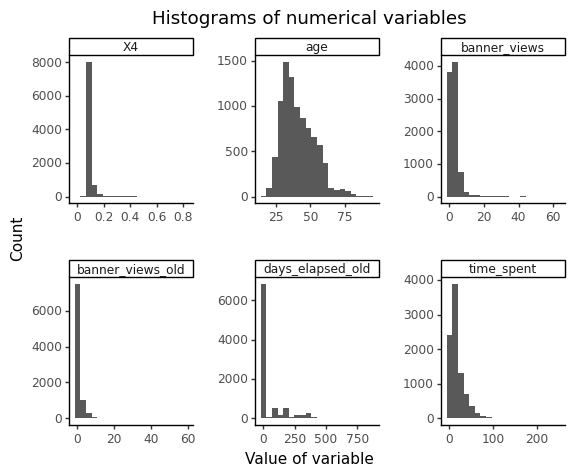

<ggplot: (8788647902681)>

In [10]:
camp_num_melt = campaign_ad[['age', 'time_spent', 'banner_views', 'banner_views_old', 'days_elapsed_old', 'X4']].melt()


ggplot(camp_num_melt
    ) + aes('value'
    ) + facet_wrap('variable', scales='free'
    ) + geom_histogram(bins = 20
    ) + theme_classic(
    ) + theme(subplots_adjust={'wspace': 0.5, 'hspace': 0.5}
    ) + labs(title='Histograms of numerical variables',
             x='Value of variable',
             y='Count')

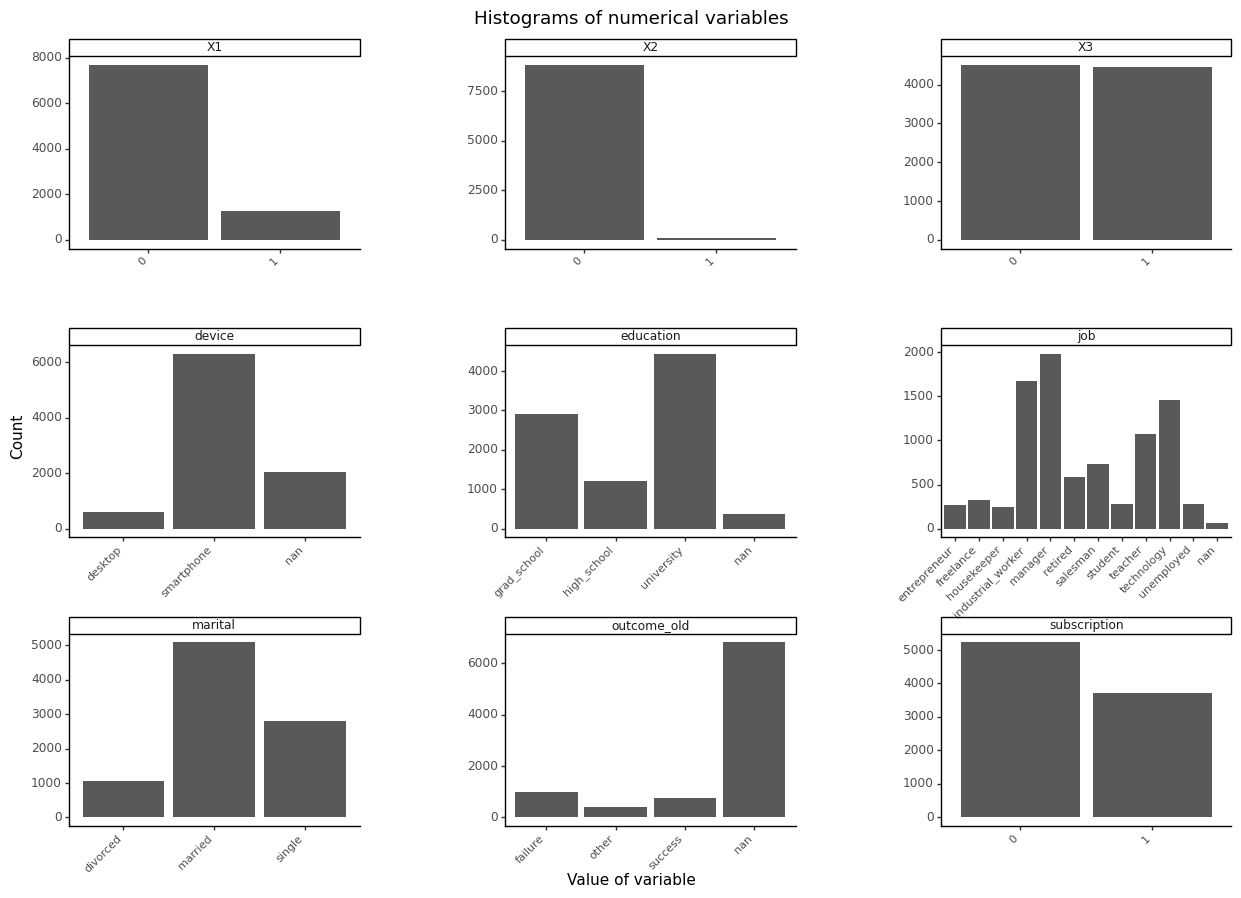

<ggplot: (8788640193533)>

In [11]:
camp_cat_melt = campaign_ad[['job', 'marital', 'education', 'device', 'outcome_old', 'X1', 'X2', 'X3', 'subscription']].melt()

ggplot(camp_cat_melt
    ) + aes('value'
    ) + facet_wrap('variable', scales='free'
    ) + geom_bar(
    ) + theme_classic(
    ) + theme(subplots_adjust={'wspace': 0.5, 'hspace': 0.5},
              axis_text_x=element_text(angle = 45, vjust = 1, hjust=1, size=8),
              figure_size=(15,10),
              axis_title_x=element_text(margin={'t': 20})
    ) + labs(title='Histograms of numerical variables',
             x='Value of variable',
             y='Count')

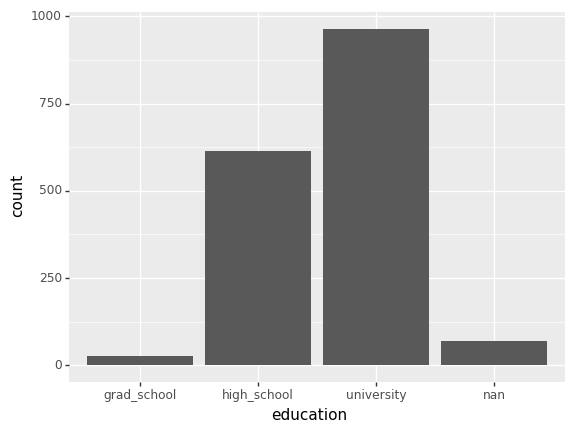

<ggplot: (8788647950568)>

In [12]:
a = campaign_ad.loc[campaign_ad["job"] == "industrial_worker", ]

ggplot(a, aes("education")) + geom_bar()

In [14]:
campaign_old = campaign_ad.loc[campaign_ad["days_elapsed_old"] > -1, ]
campaign_old.describe()

,age,time_spent,banner_views,banner_views_old,days_elapsed_old,X4
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,41.561657,16.117869,1.901349,3.162401,208.962773,0.089008
std,12.643756,13.471045,1.361051,3.280375,120.495410,0.035206
min,18.000000,0.050000,1.000000,1.000000,1.000000,0.062708
25%,32.000000,7.200000,1.000000,1.000000,99.000000,0.074819
50%,38.000000,12.250000,1.000000,2.000000,183.000000,0.079449
75%,50.000000,20.700000,2.000000,4.000000,300.000000,0.091733
max,93.000000,102.600000,11.000000,58.000000,854.000000,0.810043


In [15]:
campaign_old.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149 entries, 0 to 8951
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               2149 non-null   int64   
 1   job               2130 non-null   category
 2   marital           2149 non-null   category
 3   education         2062 non-null   category
 4   device            2132 non-null   category
 5   date              2149 non-null   object  
 6   time_spent        2149 non-null   float64 
 7   banner_views      2149 non-null   int64   
 8   banner_views_old  2149 non-null   int64   
 9   days_elapsed_old  2149 non-null   int64   
 10  outcome_old       2148 non-null   category
 11  X1                2149 non-null   category
 12  X2                2149 non-null   category
 13  X3                2149 non-null   category
 14  X4                2149 non-null   float64 
 15  subscription      2149 non-null   category
dtypes: category(9), float64(

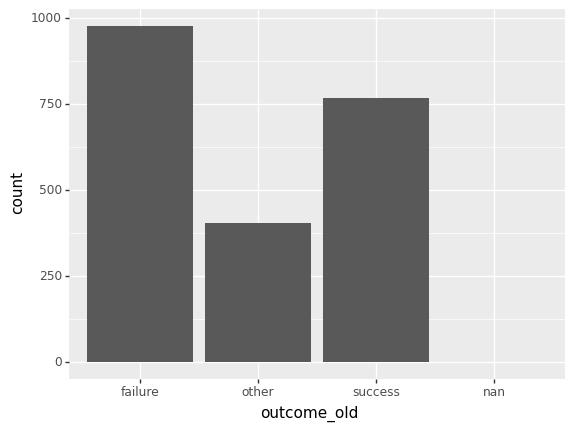

<ggplot: (8788649369061)>

In [16]:
ggplot(campaign_old, aes("outcome_old")) + geom_bar()

In [17]:
campaign_new = campaign_ad.loc[campaign_ad["days_elapsed_old"] == -1, ]
campaign_new.describe()

,age,time_spent,banner_views,banner_views_old,days_elapsed_old,X4
count,6803.000000,6803.000000,6803.000000,6803.0,6803.0,6803.000000
mean,41.088049,17.450125,2.742467,0.0,-1.0,0.085844
std,11.300747,17.839125,3.120928,0.0,0.0,0.028470
min,18.000000,0.000000,1.000000,0.0,-1.0,0.000000
25%,32.000000,5.750000,1.000000,0.0,-1.0,0.073611
50%,39.000000,11.100000,2.000000,0.0,-1.0,0.077179
75%,49.000000,23.350000,3.000000,0.0,-1.0,0.086726
max,95.000000,245.400000,63.000000,0.0,-1.0,0.677937


In [18]:
campaign_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6803 entries, 2 to 8950
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               6803 non-null   int64   
 1   job               6761 non-null   category
 2   marital           6803 non-null   category
 3   education         6512 non-null   category
 4   device            4770 non-null   category
 5   date              6803 non-null   object  
 6   time_spent        6803 non-null   float64 
 7   banner_views      6803 non-null   int64   
 8   banner_views_old  6803 non-null   int64   
 9   days_elapsed_old  6803 non-null   int64   
 10  outcome_old       0 non-null      category
 11  X1                6803 non-null   category
 12  X2                6803 non-null   category
 13  X3                6803 non-null   category
 14  X4                6803 non-null   float64 
 15  subscription      6803 non-null   category
dtypes: category(9), float64(

In [67]:
X = campaign_ad.drop(columns="subscription")

encoder = OneHotEncoder()
X_s = encoder.fit_transform(X[["job", "marital", "education"]])
X_s.shape

(8952, 19)

In [40]:
imputer = IterativeImputer(random_state=69)

X_imputed = imputer.fit_transform(campaign_ad[['age', 'time_spent', 'banner_views', 'banner_views_old', 'days_elapsed_old', 'X4']],
                                  y=campaign_ad[["job"]])
X_imputed
pd.DataFrame(X_imputed)
# estimator=RandomForestClassifier()

ValueError: could not convert string to float: 'freelance'

In [41]:
imputer = IterativeImputer(random_state=69)

X_imputed = imputer.fit_transform(campaign_ad[['job', 'marital', 'device']],
                                  y=campaign_ad[["job"]])
X_imputed
pd.DataFrame(X_imputed)
# estimator=RandomForestClassifier()

ValueError: could not convert string to float: 'freelance'

In [39]:
campaign_ad[['age', 'time_spent', 'banner_views', 'banner_views_old', 'days_elapsed_old', 'X4']]

,age,time_spent,banner_views,banner_views_old,days_elapsed_old,X4
Id,,,,,,
0,28,26.80,3,4,196,0.072803
1,48,13.05,1,1,79,0.075454
2,27,8.10,3,0,-1,0.068110
3,44,7.10,2,1,369,0.091942
4,29,15.90,2,2,143,0.085922
...,...,...,...,...,...,...
8947,54,7.30,1,0,-1,0.072803
8948,43,37.75,2,0,-1,0.081456
8949,27,29.00,3,0,-1,0.079186
